In [38]:
import pandas as pd
import matplotlib.pyplot as plt

file = "NBA_DATA.xlsx"

data = pd.read_excel(file)

print(data.shape)

(716, 28)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 28 columns):
 #   Column                                                                                                                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                     --------------  -----  
 0   FULL NAME                                                                                                                                                                                                                  716 non-null    object 
 1   TEAM                                                                                                                                              

In [40]:
data.rename(columns= {'eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA': 'eFG%',
                      'TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.': 'TS%',
                      'TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.': 'TRB%',
                      'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor' : 'MIN%',
                      'USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor':'USG%',
                      'TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions' : 'TO%',
                      'APGAssistsAssists per game.': 'APG',
                      'SPGStealsSteals per game.' : 'SPG',
                      'BPGBlocksBlocks per game.' : 'BPG',
                      'PPGPointsPoints per game.' : 'PPG',
                      'RPGReboundsRebounds per game.' : 'RPG',
                      'TOPGTurnoversTurnovers per game.' :'TOPG',
                      'VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10' :'VI',
                      'AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court':'AST%',
                      'ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.':'ORTG',
                      'DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.':'DRTG'}, inplace = True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FULL NAME  716 non-null    object 
 1   TEAM       716 non-null    object 
 2   POS        716 non-null    object 
 3   AGE        716 non-null    float64
 4   GP         716 non-null    int64  
 5   MPG        716 non-null    float64
 6   MIN%       716 non-null    float64
 7   USG%       716 non-null    float64
 8   TO%        703 non-null    float64
 9   FTA        716 non-null    int64  
 10  FT%        716 non-null    float64
 11  2PA        716 non-null    int64  
 12  2P%        716 non-null    float64
 13  3PA        716 non-null    int64  
 14  3P%        716 non-null    float64
 15  eFG%       701 non-null    float64
 16  TS%        703 non-null    float64
 17  PPG        716 non-null    float64
 18  RPG        716 non-null    float64
 19  TRB%       716 non-null    float64
 20  APG       

In [42]:
data[['FULL NAME', 'TEAM', 'GP']].sort_values(by='GP', ascending=False).head(10)

,FULL NAME,TEAM,GP
72,Mikal Bridges,Pho,82
22,Deni Avdija,Was,82
398,Kevon Looney,Gol,82
536,Dwight Powell,Dal,82
52,Saddiq Bey,Det,82
411,Terance Mann,Lac,81
94,Alec Burks,Nyk,81
450,Patty Mills,Bro,81
194,Dorian Finney-Smith,Dal,80
202,Evan Fournier,Nyk,80


In [43]:
#data[(data['GP'] > 41) & (data['ORTG'] > 120) & (data['DRTG'] > 110) & (data['MPG'] > 24)].sort_values(by='GP',ascending=False)

In [44]:
data[['FULL NAME', 'PPG', 'APG', 'RPG']][(data['GP'] > 41) & (data['PPG'] > 25) & (data['APG'] > 5) & (data['RPG'] > 5)].sort_values(by='PPG', ascending=False)

,FULL NAME,PPG,APG,RPG
323,LeBron James,30.3,6.2,8.2
13,Giannis Antetokounmpo,29.9,5.8,11.6
176,Kevin Durant,29.9,6.4,7.4
159,Luka Doncic,28.4,8.7,9.1
463,Ja Morant,27.4,6.7,5.7
343,Nikola Jokic,27.1,7.9,13.8
142,Stephen Curry,25.5,6.3,5.2


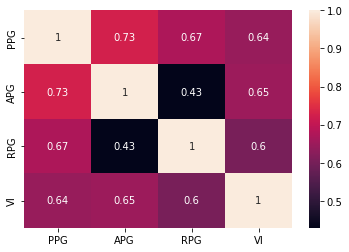

In [45]:
import seaborn as sns
#Heat map
# VI = measures a player’s ability to produce in points, assists, and rebounds
correlation = data[['PPG', 'APG', 'RPG', 'VI']].corr()
sns.heatmap(correlation, annot=True)

In [46]:
#Cluster of players (k-means)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=1)  # KMeans model (5 clusters)
efficient_cols = data._get_numeric_data().dropna(axis=1)  # get pure data
model.fit(efficient_cols) # training
labels = model.labels_
labels

array([2, 2, 1, 4, 2, 3, 4, 3, 2, 0, 4, 4, 2, 1, 4, 3, 3, 3, 4, 4, 4, 4,
       2, 4, 2, 4, 0, 0, 1, 0, 3, 3, 0, 4, 3, 1, 1, 3, 4, 4, 0, 0, 4, 2,
       2, 3, 4, 0, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 4, 3, 3, 4, 4, 4, 1, 0,
       2, 4, 0, 4, 0, 1, 2, 2, 2, 0, 4, 2, 4, 4, 4, 4, 0, 0, 2, 1, 4, 4,
       4, 1, 4, 4, 3, 0, 3, 4, 1, 4, 3, 0, 4, 4, 2, 4, 4, 2, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 4, 3, 0, 0, 2, 0, 4, 3, 3, 4, 4, 4, 4, 0,
       0, 4, 0, 4, 3, 4, 4, 1, 0, 0, 3, 2, 4, 0, 4, 0, 4, 4, 1, 4, 4, 2,
       4, 2, 0, 4, 0, 1, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 4, 4,
       1, 4, 1, 4, 0, 4, 0, 0, 1, 4, 4, 4, 0, 0, 4, 0, 4, 4, 3, 4, 4, 0,
       0, 0, 4, 0, 3, 1, 4, 4, 4, 4, 0, 4, 4, 4, 2, 3, 4, 4, 1, 4, 4, 4,
       0, 2, 0, 2, 1, 4, 4, 2, 4, 4, 2, 3, 3, 2, 4, 0, 0, 0, 3, 0, 2, 0,
       0, 0, 4, 0, 2, 0, 4, 2, 3, 3, 0, 0, 4, 2, 0, 3, 4, 4, 1, 2, 0, 0,
       4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 1, 3, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4,
       1, 0, 0, 0, 4, 4, 4, 3, 2, 4, 4, 4, 0, 4, 3,

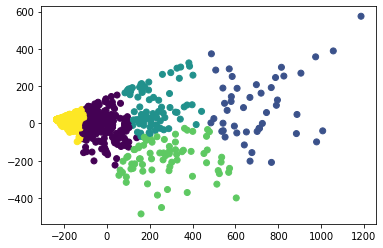

In [47]:
# plot clusters
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_cols = pca_2.fit_transform(efficient_cols)
plt.scatter(x=plot_cols[:,0], y=plot_cols[:,1], c=labels)

In [48]:
LeBron = efficient_cols.loc[ data['FULL NAME'] == 'LeBron James', :]

Jokic = efficient_cols.loc[ data['FULL NAME'] == 'Nikola Jokic', :]

Mikal = efficient_cols.loc[ data['FULL NAME'] == 'Mikal Bridges', :]

In [49]:
LeBron_list = LeBron.values.tolist()
Jokic_list = Jokic.values.tolist()
Mikal_list = Mikal.values.tolist()

print("LeBron's Cluster: ", model.predict(LeBron_list))
print("Jokic's Cluster: ", model.predict(Jokic_list))
print("Mikal's Cluster: ", model.predict(Mikal_list))

LeBron's Cluster:  [1]
Jokic's Cluster:  [1]
Mikal's Cluster:  [2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [50]:
# %80 train, %20 test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['PPG']], data[['APG']], test_size=0.2, random_state=2)

In [51]:
# Predicting APG from PPG
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
predicts = linear.predict(x_test)

#print(predicts)
#print(y_test)

In [52]:
# success rate
linear_score = linear.score(x_test, y_test)
print("Score: ", linear_score)

# Since points and assists are different concepts, the accuracy rate is low.

Score:  0.4947593819968187


In [53]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data[['MPG']], data[['PPG']], test_size=0.2, random_state=2)
linear2 = LinearRegression()
linear2.fit(x_train2, y_train2)
predicts = linear2.predict(x_test2)
print("Score: ", linear2.score(x_test2, y_test2))

# The more time a player has, the more chances to score.

Score:  0.738672950115288


In [54]:
# MVP Criterias
mvp_candidates = data[(data['GP'] > 66) & (data['PPG'] > 25) & (data['APG'] > 4) & (data['RPG'] > 4) & (data['2P%'] > 0.4)]
mvp_candidates[['FULL NAME', 'GP', 'PPG', 'APG', 'RPG', '2P%']]

,FULL NAME,GP,PPG,APG,RPG,2P%
13,Giannis Antetokounmpo,67,29.9,5.8,11.6,0.616
64,Devin Booker,68,26.8,4.8,5.0,0.508
150,DeMar DeRozan,76,27.9,4.9,5.2,0.520
184,Joel Embiid,68,30.6,4.2,11.7,0.529
343,Nikola Jokic,74,27.1,7.9,13.8,0.652
453,Donovan Mitchell,67,25.9,5.3,4.2,0.533
623,Jayson Tatum,76,26.9,4.4,8.0,0.524


In [55]:
gp_mean = mvp_candidates['GP'].mean()
ppg_mean = mvp_candidates['PPG'].mean()
apg_mean = mvp_candidates['APG'].mean()
rpg_mean = mvp_candidates['RPG'].mean() 
efg_mean = mvp_candidates['eFG%'].mean()


mvp_points = []

for i in range(0,len(mvp_candidates)):
  mvp_points.append((mvp_candidates.iloc[i]['GP'] - gp_mean)/82   + (mvp_candidates.iloc[i]['PPG'] - ppg_mean) * 0.35 + (mvp_candidates.iloc[i]['APG'] - apg_mean) * 0.15 + (mvp_candidates.iloc[i]['RPG'] - rpg_mean) * 0.10 + (mvp_candidates.iloc[i]['eFG%']*100 - efg_mean) * 0.2)


mvp_candidates = mvp_candidates.assign(MVP_Points = mvp_points)

mvp_candidates[['FULL NAME', 'GP', 'PPG', 'APG', 'RPG', 'eFG%', 'MVP_Points']].sort_values(by='MVP_Points', ascending=False)

,FULL NAME,GP,PPG,APG,RPG,eFG%,MVP_Points
343,Nikola Jokic,74,27.1,7.9,13.8,0.620,12.974156
13,Giannis Antetokounmpo,67,29.9,5.8,11.6,0.582,12.573790
184,Joel Embiid,68,30.6,4.2,11.7,0.534,11.640985
150,DeMar DeRozan,76,27.9,4.9,5.2,0.521,9.988546
623,Jayson Tatum,76,26.9,4.4,8.0,0.526,9.943546
64,Devin Booker,68,26.8,4.8,5.0,0.530,9.650985
453,Donovan Mitchell,67,25.9,5.3,4.2,0.533,9.378790


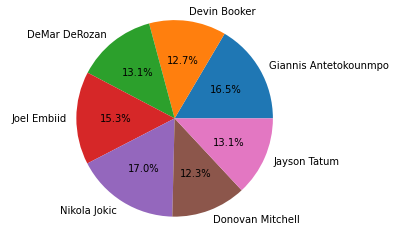

In [56]:
# Ağırlıklı kriterlere göre mvp tahminleri ve pie chart
mvp_points



fig1, ax1 = plt.subplots()
ax1.pie(mvp_candidates['MVP_Points'], labels=mvp_candidates['FULL NAME'], autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

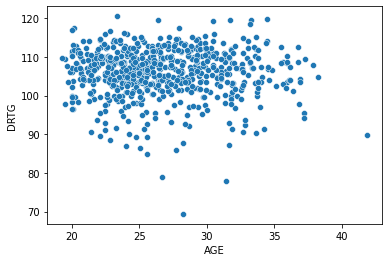

In [62]:
# MPG and PPG correlation (line graph)
ax = sns.scatterplot(x="AGE", y="DRTG", data=data)
ax.set_title("Age and Defence Correlation")

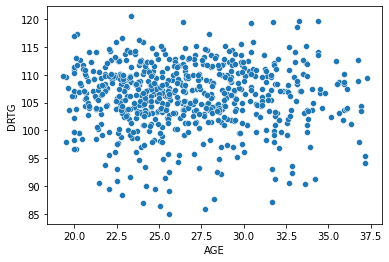

In [75]:
wo_outliers = data[(data['AGE'] > 37.5) | (data['DRTG'] < 85)]
wo_outliers = pd.concat([data, wo_outliers]).drop_duplicates(keep = False)

sns.scatterplot(x="AGE", y="DRTG", data=wo_outliers)

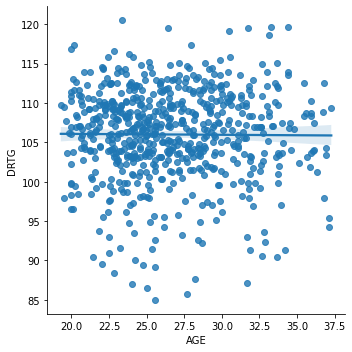

In [76]:
sns.lmplot(x="AGE", y="DRTG", data=wo_outliers)

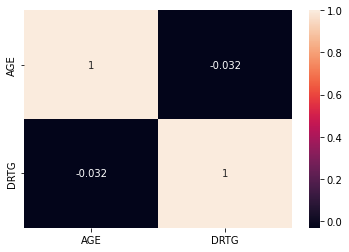

In [78]:
correlation_age_drtg = data[['AGE', 'DRTG']].corr()
sns.heatmap(correlation_age_drtg, annot=True)